## Simulating a Doppler Radar System
This is a fun activity that uses our knowledge of trigonometric functions to follow the steps a Doppler radar takes to measure the speed of a moving object. Doppler radars are used in aviation, sounding satellites, Major League Baseball's StatCast system, meteorology, radar guns, radiology and healthcare.

![title](./image.png)

Assume a car is moving toward or away from the radar. Let's set the car's speed and specify whether the car is moving toward or away from the radar. In the code below enter a value for the speed $v$. The code will interpret your number in terms of $km/h$:

In [310]:
# kilometers per hour
v = 100

In the next code snippet, set the value of $d$ to 1 if you want the car to move toward the radar and -1 if you want the car to move away from the radar:

In [311]:
d = 1 # the value 1 means toward the radar and -1 means away from the radar

The Doppler radar first produces a sine function of the form $$f(x)=\sin(\omega x).$$
In the code snippet below enter a value for $\omega$:

In [312]:
w = 100000

To understand the function $f(x)$ better, let's graph it:

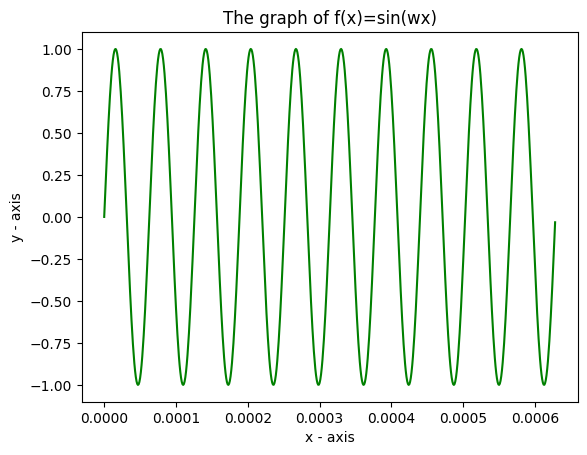

In [313]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(0, 20*(np.pi)/w, 0.1/w) # x-axis values
y = np.sin(w*x) # corresponding y-axis values
 
# plotting the points 
plt.plot(x, y, 'g')
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('The graph of f(x)=sin(wx)')
 
# function to show the plot
plt.show()

Next, the radar powers the antennas with this function and sends out the function in the form of wireless (electromagnetic) signal. The wireless signal hits the moving object and bounces back and the radar receives it. The following code snippet simulates the bouncing of the signal and gives us the received function:

In [314]:
import random as rm

c = 300000000 # speed of EM waves in m/s
def simulate(w, v, d):
    v_mod = v / 3.6 * (1+rm.random()/10-.05)
    #v_mod = v / 3.6
    w_n=(c+d*v_mod)*w/c
    amplitude = rm.random()/10+.45
    return amplitude, w_n

amplitude, w_new = simulate(w,v,d)
txt = f"The received function is {amplitude:.2f}sin({w_new:.9f}x)."
print(txt)

    

The received function is 0.52sin(109598.262555464x).


The number that appears before $x$ in the received function (signal) is the new frequency. Let's call it $w_{\textrm{new}}$. Let's graph both the sent signal and the received signal together:

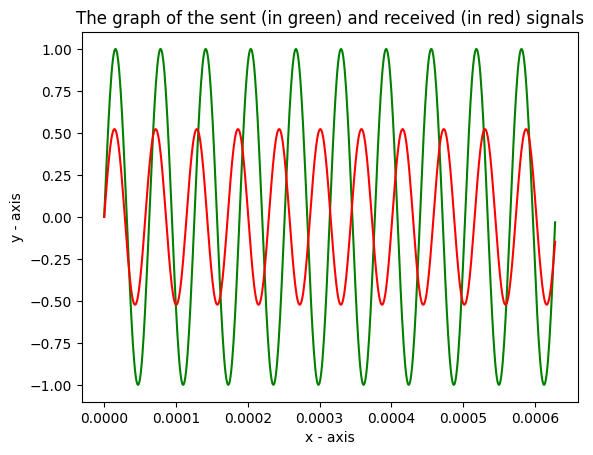

In [318]:
y_new = amplitude*np.sin(w_new*x)
 
# plotting the points

plt.plot(x, y, 'g')
plt.plot(x, y_new, 'r')
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('The graph of the sent (in green) and received (in red) signals')
 
# function to show the plot
plt.show()

In the above plot, the blue function is the sent signal and the red function is the received signal. The blue function is squished vertically to give the red function because the signal loses some energy when traveling to the object and bounding back from it. The blue function is also squished horizontally. You may not see this as the amount is very small. But if the speed of the car is increased, then the change in frequency (the amount the function gets squished horizontally) becomes more visible. If you want to see the change in frequency better, go back and rerun the simulation but this time enter a large value for the speed of the car (something like 10000000 km/hour).

Play around by changing the speed of the moving car and/or the direction it is moving, and see how the received signal changes.

Now that we have the new frequency $w_{\textrm{new}}$, we can plug this into the following formula to compute the speed of the car: $$v=c\cdot\frac{w_{\textrm{new}}-w}{w_{\textrm{new}}+w}.$$
Let's compute the speed of the car in the next code snippet:

In [319]:
v_new = np.abs(c*(w_new-w)/(w) * 3.6)
print(f"The speed of the car calculated by the radar is {v_new:.4f}")

The speed of the car calculated by the radar is 103661235.5990


In practice the there is always an error in the computed speed of the car. Why do you think that is?